k = 16.1773408540829 , Standardfehler = 0.31224552133482286
n_beta_0 = 0.1836121666112931 , Standardfehler = 0.01600130076680389
A = 53.4237941736416 , Standardfehler = 2.7703470184482213


Chi-Quadrat = 18.59844997214151
Freiheitsgrade = 7
Chi-Quadrat reduziert = 2.656921424591644
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = 1.0 %


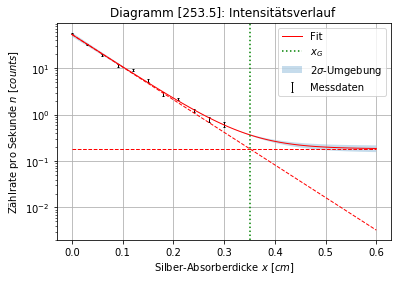

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#Messwerte aus Tabelle 253.1: n über x und t

n = np.array([1657,968,580,345,275,165,85,259,148,95,75]) # in counts
fehler_n = np.sqrt(n)

x = np.array([0.00, 0.03, 0.06, 0.09, 0.12, 0.15, 0.18, 0.21, 0.24, 0.27, 0.30]) # in cm

t = np.array([30, 30, 30, 30, 30, 30, 30, 120, 120, 120, 120]) # in s

n_red = n/t
fehler_n_red = fehler_n/t
                    
def fit_func(x, k, n_beta_0, A):
    return A*np.exp(-x*k)+n_beta_0

from scipy.optimize import curve_fit

popt, pcov=curve_fit(fit_func, x, n_red, p0=[1,1,1],
sigma=fehler_n_red)

perr=np.diagonal(pcov)

#Sigma-Umgebung
nstd = 2 # um n-Sigma-Umgebung zu zeichnen
popt_top = popt+nstd*perr
popt_bot = popt-nstd*perr

#Plot-Umgebung
x_fit = np.linspace(0, max(x)*2, 100)
fit = fit_func(x_fit,*popt)
subfit_1 = popt[2]*np.exp(-x_fit*popt[0])
subfit_2 = np.full(x_fit.size, popt[1])
fit_top = fit_func(x_fit,*popt_top)
fit_bot = fit_func(x_fit,*popt_bot)


#Grenzabsorberdicke
x_G = np.log(popt[2]/popt[1])/popt[0]

#Plot
fig, ax = plt.subplots(1)
plt.errorbar(x, n_red, yerr=fehler_n_red, lw=1, ecolor='k', fmt='none', capsize=1, label='Messdaten')
plt.title('Diagramm [253.5]: Intensitätsverlauf ')
plt.grid(True)
plt.yscale('log')
plt.xlabel('Silber-Absorberdicke '+r'${x}$'+' '+r'${[cm]}$')
plt.ylabel('Zählrate pro Sekunde '+r'${n}$' + ' '+r'${[counts]}$')
plt.plot(x_fit, fit, 'r', lw=1, label='Fit')
plt.axvline(x=x_G, color='g', linestyle=':', label=r'${x_G}$')
plt.plot(x_fit, subfit_1, 'r--', lw=1)
plt.plot(x_fit, subfit_2, 'r--', lw=1)
ax.fill_between(x_fit, fit_top, fit_bot, alpha=.25, label=str(nstd)+r'$\sigma$'+'-Umgebung')
plt.legend(loc='best')

#Chi-Quadrat
chi2_=np.sum((fit_func(x,*popt)-(n_red))**2/(fehler_n_red**2))
dof=len(n_red)-4 #dof:degrees of freedom, Freiheitsgrad
chi2_red=chi2_/dof

from scipy.stats import chi2

prob=round(1-chi2.cdf(chi2_,dof),2)*100
                    

#Output
plt.savefig('figures/253_Diagramm1.pdf', format='pdf')

print('k =', popt[0], ', Standardfehler =', perr[0])
print('n_beta_0 =', popt[1], ', Standardfehler =', perr[1])
print('A =', popt[2], ', Standardfehler =', perr[2])
print('\n')                    
print('Chi-Quadrat =', chi2_)
print('Freiheitsgrade =', dof)
print('Chi-Quadrat reduziert =', chi2_red)
print('Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten =', prob, '%')

k = 0.6952459080357205 , Standardfehler = 0.0010022142774809655
n_gamma_0 = 2.1967197468793778 , Standardfehler = 0.25938828791464175
A = 57.479768076753686 , Standardfehler = 1.7360819867819353


Chi-Quadrat = 23.56725803263435
Freiheitsgrade = 7
Chi-Quadrat reduziert = 3.3667511475191927
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = 0.0 %


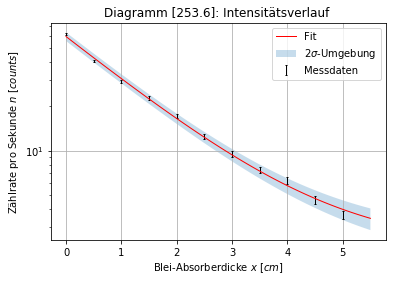

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#Messwerte aus Tabelle 253.2: n über x und t

n = np.array([3731, 2443, 1763, 1368, 1031, 746, 567, 442, 376, 276, 219]) # in counts
fehler_n = np.sqrt(n)

x = np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]) # in cm

t = np.array([60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60]) # in s
                    
n_red = n/t
fehler_n_red = fehler_n/t
                    
def fit_func(x, k, n_beta_0, A):
    return A*np.exp(-x*k)+n_beta_0


from scipy.optimize import curve_fit

popt, pcov=curve_fit(fit_func, x, n_red, p0=[1,1,1],
sigma=fehler_n_red)

perr=np.diagonal(pcov)

#Sigma-Umgebung
nstd = 2 # um n-Sigma-Umgebung zu zeichnen
popt_top = popt+nstd*perr
popt_bot = popt-nstd*perr

#Plot-Umgebung
x_fit = np.linspace(0, max(x)*1.1, 100)
fit = fit_func(x_fit,*popt)
fit_top = fit_func(x_fit,*popt_top)
fit_bot = fit_func(x_fit,*popt_bot)

#Plot
fig, ax = plt.subplots(1)
plt.errorbar(x, n_red, yerr=fehler_n_red, lw=1, ecolor='k', fmt='none', capsize=1, label='Messdaten')
plt.title('Diagramm [253.6]: Intensitätsverlauf ')
plt.grid(True)
plt.yscale('log')
plt.xlabel('Blei-Absorberdicke '+r'${x}$'+' '+r'${[cm]}$')
plt.ylabel('Zählrate pro Sekunde '+r'${n}$' + ' '+r'${[counts]}$')
plt.plot(x_fit, fit, 'r', lw=1, label='Fit')
ax.fill_between(x_fit, fit_top, fit_bot, alpha=.25, label=str(nstd)+r'$\sigma$'+'-Umgebung')
plt.legend(loc='best')

#Chi-Quadrat
chi2_=np.sum((fit_func(x,*popt)-(n_red))**2/(fehler_n_red**2))
dof=len(n_red)-4 #dof:degrees of freedom, Freiheitsgrad
chi2_red=chi2_/dof

from scipy.stats import chi2

prob=round(1-chi2.cdf(chi2_,dof),2)*100
                    

#Output
plt.savefig('figures/253_Diagramm2.pdf', format='pdf')

print('k =', popt[0], ', Standardfehler =', perr[0])
print('n_gamma_0 =', popt[1], ', Standardfehler =', perr[1])
print('A =', popt[2], ', Standardfehler =', perr[2])
print('\n')                    
print('Chi-Quadrat =', chi2_)
print('Freiheitsgrade =', dof)
print('Chi-Quadrat reduziert =', chi2_red)
print('Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten =', prob, '%')

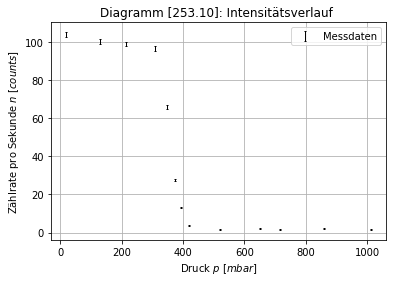

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#Messwerte aus Tabelle 253.4: n über p und t

n = np.array([6234, 6010, 5942, 5804, 3958, 1652, 792, 220, 98, 123, 95, 125, 93]) # in counts
fehler_n = np.sqrt(n)

p = np.array([20, 129, 214, 310, 348, 375, 392, 421, 520, 651, 716, 859, 1011]) # in mbar

t = np.array([60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60]) # in s
                    
n_red = n/t
fehler_n_red = fehler_n/t

#Plot
plt.errorbar(p, n_red, yerr=fehler_n_red, lw=1, ecolor='k', fmt='none', capsize=1, label='Messdaten')
plt.title('Diagramm [253.10]: Intensitätsverlauf ')
plt.grid(True)
plt.xlabel('Druck '+r'${p}$'+' '+r'${[mbar]}$')
plt.ylabel('Zählrate pro Sekunde '+r'${n}$' + ' '+r'${[counts]}$')
plt.legend(loc='best')

#Output
plt.savefig('figures/253_Diagramm3.pdf', format='pdf')